<h1 style="font-family:verdana;"> <center>Used Bike Prices In India</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Peace </center></p>

***

<br>

![](https://th.bing.com/th/id/R.afb7a817bc5ee607954aee88c21a6b6e?rik=%2bmu50W9tHO525w&riu=http%3a%2f%2fcliparts.co%2fcliparts%2fgie%2faXr%2fgieaXr8id.jpg&ehk=sN2rqTeVE4ZGhb3kdm%2bcZqAHMndsUcZSNdXuO575sFg%3d&risl=&pid=ImgRaw&r=0)

<br>

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
 📕Data Dictionary
<a class="anchor" id="1"></a> 


This dataset contains around 8K records of used bike prices in India. The data has been collected from one of the leading online portal to sell used bikes in India via web scrapping.

## Dataset Information
- `model_name`
The name of the bike's model. It contains some additional information like model year,engine etc.

- `model_year`
The year in which the model was built.

- `kms_driven`
Total kilometers the bike has been driven.

- `owner`
The represents which type of owner the bike has like it is first owner which means the current owner had bought the this bike as new, second owner means the bike has been sold to this owner from first owner and so on.

- `location`
The location of the seller.

- `mileage`
Average mileage the bike gives. Its is represented as kilometer per liter of petrol (kmpl).

- `power`
Power is in terms of Bhp. BHP is the rate at which the torque generated by the engine in a bike is delivered to the wheels. Such that faster the deliverability, higher is the speed of the motorcycle and vice versa. For a bike that consists of a lower BHP can pull higher loads and for a bike that contains a greater BHP can propel the bike at faster speeds.
Thus, BHP depends on several factors such as deliverability, weight and power generation of the bike. It’s the most common way of rating a bike and determining which ones might be faster

- `price`
This is the target variable of the dataset. t is in Indian rupee

<div style='color: #216969;
           background-color:#EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🏗️Import Necessary Libraries
<a class="anchor" id="2"></a> 

In [158]:
# Data Wrangling libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime

# Visualization Libraries
from IPython.display import display,HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine Learning Estimators
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore the warnings to remove messy output logs
import warnings
warnings.filterwarnings('ignore')

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📥Importing the Dataset<a class="anchor" id="3"></a> 

<table align="left">
    <tr>
        <td width="8%">
            <img src="OIP.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data.
                    </b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [159]:
data = pd.read_csv("bikes.csv")

In [160]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [161]:
# 'shape' returns the dimensions of the data
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 7857
Number of columns: 8


##### We see the dataframe has 8 columns and 7857 rows. It means there are 8 variables and 7857 observations.

## 🔭Data Type

**Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.**

**. 🪄Check the data type.**

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


<table align="left">
    <tr>
        <td width="8%">
            <img src="OIP.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column.<br><br>
                        <ol type="1"><li>Check the missing values</li>
                            <li>Visualize missing values using heatmap</li>
                            <li>Handle missing values
                            <ul type="i">
                            </ul>
                        </ol>  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [163]:
# 'isnull().sum()' returns the number of missing values in each variable
Total = data.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = data[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
power,31,0.394553,object
location,19,0.241823,object
mileage,11,0.140003,object
model_name,0,0.000000,object
model_year,0,0.000000,int64
kms_driven,0,0.000000,object
owner,0,0.000000,object
price,0,0.000000,int64


In [164]:
data.duplicated().sum()

0

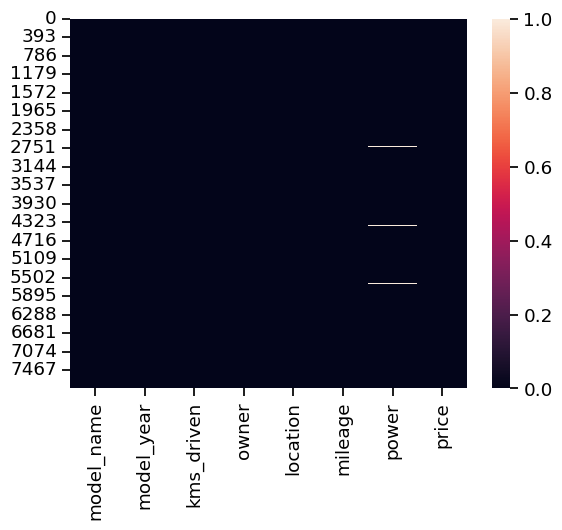

In [165]:
sns.heatmap(data.isnull())
plt.show()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🧹Data Preprocessing<a class="anchor" id="3"></a> 

I am removing these rows because they constitute a very small number and removing them will not affect our model's performance

In [166]:
data.dropna(inplace=True)

In [167]:
data.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64

## `model_name`

In [168]:
data['company'] = data['model_name'].apply(lambda x:' '.join(x.split()[0:1]))

**Extracting the first word from 'model_name' and assigning it to 'company' column**


In [169]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa


In [170]:
data['bike_model'] = data['model_name'].apply(lambda x:' '.join(x.split()[1:3]))

In [171]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj,Avenger Cruise
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal,Enfield Classic
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung,GT250R 2012
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj,Dominar 400
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa,Perak 330cc


## `model_year`

In [172]:
data['age'] = 2023-data['model_year']


I will add a new column and label it "age." This column will display the total number of years that the bike has been ridden.

In [173]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung,GT250R 2012,11
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj,Dominar 400,6
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa,Perak 330cc,3


**To extract the numeric number, I will remove 'Km' from the 'kms_driven' column.**

## `kms_driven`

In [174]:
data['kms_driven'] = data['kms_driven'].str.replace('Km','')

In [175]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung,GT250R 2012,11
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 s,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj,Dominar 400,6
4,Jawa Perak 330cc 2020,2020,2000,first owner,bangalore,\n\n,30 bhp,197500,Jawa,Perak 330cc,3


In [176]:
data['kms_driven'].unique()

array(['17000 ', '50000 ', '14795 ', ..., '66780 ', '16510 ', '6407 '],
      dtype=object)

In [177]:
data = data[~data['kms_driven'].str.contains("Mil")]
data = data[data['kms_driven'] != 'Yes ']
data['kms_driven'] = data['kms_driven'].astype(int)

**Filtering out rows where 'kms_driven' does not contain "Mil" and removing rows with 'kms_driven' as 'Yes '.
Converting 'kms_driven' column to integer type.**

In [178]:
data['kms_driven'].unique()

array([17000, 50000, 14795, ..., 66780, 16510,  6407])

## `owner`

In [179]:
data['owner'].unique()

array(['first owner', 'third owner', 'second owner',
       'fourth owner or more'], dtype=object)

## `location`

In [180]:
data['location'].unique()

array(['hyderabad', 'bangalore', 'jaipur', 'chennai', 'ghaziabad',
       'delhi', 'ludhiana', 'jaunpur', 'mumbai', 'chittorgarh',
       'thalassery', 'bathinda', 'dehradun', 'pune', 'navi mumbai',
       'lucknow', 'siliguri', 'gurgaon', 'rajkot', 'patna', 'udaipur',
       'bihar shariff', 'jalandhar', 'vadodara', 'visakhapatnam',
       'thiruvananthapuram', 'ahmedabad', 'bareilly', 'surat',
       'kurukshetra', 'moradabad', 'bhagalpur', 'jhunjhunu', 'kochi',
       'srikakulam', 'noida', 'chandigarh', 'reasi', 'ambala',
       'panchkula', 'balotra', 'sonipat', 'kolkata', 'jind', 'trivandrum',
       'mathura', 'panipat', 'sangli', 'howrah', 'nagpur', 'jodhpur',
       'alipore', 'secunderabad', 'patiala', 'dhrangadhra', 'avadi',
       'sri ganganagar', 'pali', 'palampur', 'baleshwar', 'panruti',
       'samana', 'salem', 'meerut', 'vellore', '24 pargana',
       'murshidabad', 'naihati', 'sambalpur', 'tuticorin', 'varanasi',
       'thane', 'chinchwad', 'durgapur', 'dharwad', '

## `mileage`

In [181]:
data['mileage'].unique()

array(['\n\n 35 kmpl', '\n\n 30 kmpl', '\n\n ', '\n\n 65 kmpl',
       '\n\n 25 kmpl', '\n\n 32 kmpl', '\n\n 40 kmpl', '\n\n 37 kmpl',
       '\n\n 53 kmpl', '\n\n 55 kmpl', '\n\n 45 kmpl', '\n\n 38 kmpl',
       '\n\n 45-55', '\n\n 29 kmpl', '\n\n 75 kmpl', '\n\n 63kmpl',
       '\n\n 31.85 kmpl', '\n\n 45-55 kmpl', '\n\n 5 kmpl',
       '\n\n 50 kmpl', '\n\n 22 kmpl', '\n\n 26 kmpl', '\n\n 42 kmpl',
       '\n\n 39.4 kmpl', '\n\n 89 kmpl', '\n\n 43 kmpl',
       '\n\n Liquid Cooled', '\n\n 65kmpl', '\n\n 95 kmpl',
       '\n\n 53.72 kmpl', '\n\n 26kmpl', '\n\n 45.8 kmpl', '\n\n 48 kmpl',
       '\n\n 52 kmpl', '\n\n 57 kmpl', '\n\n  60 kmpl', '\n\n 67 kmpl',
       '\n\n 81 kmpl', '\n\n 60 kmpl', '\n\n 59 kmpl', '\n\n 83 kmpl',
       '\n\n 40-45', '\n\n 64 kmpl', '\n\n 53kmpl', '\n\n 18 kmpl',
       '\n\n 84 kmpl', '\n\n 45-60 kmpl', '\n\n 62 kmpl',
       '\n\n 46.40 kmpl', '\n\n 85 kmpl', '\n\n 56 kmpl', '\n\n 68 kmpl',
       '\n\n 38.5 kmpl', '\n\n 58 kmpl', '\n\n 55.47 kmpl',


In [182]:
data['mileage'] = data['mileage'].astype(object)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5813 entries, 0 to 7856
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  5813 non-null   object
 1   model_year  5813 non-null   int64 
 2   kms_driven  5813 non-null   int32 
 3   owner       5813 non-null   object
 4   location    5813 non-null   object
 5   mileage     5813 non-null   object
 6   power       5813 non-null   object
 7   price       5813 non-null   int64 
 8   company     5813 non-null   object
 9   bike_model  5813 non-null   object
 10  age         5813 non-null   int64 
dtypes: int32(1), int64(3), object(7)
memory usage: 522.3+ KB


In [184]:
data['mileage'] = data['mileage'].apply(lambda x: str(x).replace("\n", '').strip())
data['mileage'] = data['mileage'].apply(lambda x: x.upper().replace("KMPL", '').strip())
data['mileage'] = data['mileage'].apply(lambda x: x.replace("KMS", '').strip())
data = data[data['mileage'] != 'LIQUID COOLED']
data = data[data['mileage'] != '']
data['mileage'] = data['mileage'].apply(lambda x: float(x) if '-' not in x else (int(x.split("-")[0]) + int(x.split("-")[1])) / 2 if len(x.split("-")) == 2 else None)
data['mileage'] = data['mileage'].astype(object)


In [185]:
data['mileage'].unique()

array([35.0, 30.0, 65.0, 25.0, 32.0, 40.0, 37.0, 53.0, 55.0, 45.0, 38.0,
       50.0, 29.0, 75.0, 63.0, 31.85, 5.0, 22.0, 26.0, 42.0, 39.4, 89.0,
       43.0, 95.0, 53.72, 45.8, 48.0, 52.0, 57.0, 60.0, 67.0, 81.0, 59.0,
       83.0, 42.5, 64.0, 18.0, 84.0, 52.5, 62.0, 46.4, 85.0, 56.0, 68.0,
       38.5, 58.0, 55.47, 28.0, 15.0, 90.0, 63.97, 16.0, 20.0, 21.0,
       18.86, 13.0, 12.0, 17.0, 27.0, 19.0, 72.0, 69.0, 54.0, 12.5, 20.3,
       23.0, 17.85, 70.0], dtype=object)

## `power`

In [186]:
data['power'] = data['power'].astype(str)
data['power'] = data['power'].apply(lambda x: x.upper().replace("BHP", '').strip())

# Handling 29.9 hp / 22 kW type data
data['power'] = data['power'].apply(lambda x: x if x.find("HP") == -1 else str(float(x[:x.find("HP") - 1])))
# 1 kw = 1.34hp
data['power'] = data['power'].apply(lambda x: x if x.find("KW") == -1 else str(float(x[:x.find("KW") - 1]) * 1.34))
# 1 ps = 0.98592 hp
data['power'] = data['power'].apply(lambda x: x if x.find("PS") == -1 else str(float(x[:x.find("PS") - 1]) * 0.98592))

data['power'] = data['power'].astype(float)
# Taking figure up to 2 decimal places
data['power'] = round(data['power'], 2)

In [187]:
data['power'].unique()

array([ 19.  ,  19.8 ,  28.  ,  25.  ,  17.  ,  42.9 ,  24.5 ,  12.  ,
        13.  ,  21.  ,  24.8 ,  26.15,   8.9 ,   9.  ,  11.  ,  24.6 ,
        27.2 ,  19.1 ,  14.  ,   8.  ,  29.63,   9.38,   8.2 ,  14.3 ,
        11.9 ,  25.1 ,  33.  ,  29.1 ,  16.  ,  16.7 ,   8.1 ,  18.1 ,
        15.  ,   7.91,  17.03,  20.3 ,  13.8 ,   7.4 ,  14.79,  42.3 ,
        20.78,  20.  ,  12.9 ,  12.32,  24.3 ,   8.5 ,   8.17,  14.6 ,
        12.5 ,  11.8 ,  26.  ,   9.3 ,  24.2 ,  18.28,   7.7 ,  14.2 ,
        65.  ,  26.1 ,  15.3 ,  18.3 ,   7.44,  12.92,  10.9 ,  11.64,
        17.8 ,  16.8 ,   8.39,  20.11,   7.5 ,  12.2 ,  16.6 ,  10.72,
        31.5 , 139.  ,  26.45,  18.76,  11.83,   8.44,  18.  ,   8.08,
        44.  ,  60.  ,  43.  ,   9.4 ,  67.2 ,  50.  ,  54.2 ,  47.  ,
        10.59,  70.  , 111.  ,  29.9 ,  24.  ,  25.35,  41.4 ,  77.  ,
        18.7 ,  72.68,  75.  ,  37.73, 127.  ,   7.  , 186.3 ,  66.4 ,
        93.  , 159.7 , 119.37,  39.  ,  26.21,  71.  ,  15.6 ,  82.7 ,
      

In [188]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,Hyosung,GT250R 2012,11
5,KTM Duke 200cc 2012,2012,24561,third owner,bangalore,35.0,25.0,63400,KTM,Duke 200cc,11
6,Bajaj Pulsar 180cc 2016,2016,19718,first owner,bangalore,65.0,17.0,55000,Bajaj,Pulsar 180cc,7


In [189]:
data.shape

(5079, 11)

In [254]:
numerical_columns = ['kms_driven', 'mileage', 'power', 'price']  # Add the names of the numerical columns

# Create box plots for each numerical column
for column in numerical_columns:
    fig = px.box(data, y=column)
    fig.update_layout(title=f'Box Plot of {column}', yaxis_title=column)
    fig.show()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📊 Data Analysis<a class="anchor" id="3"></a> 

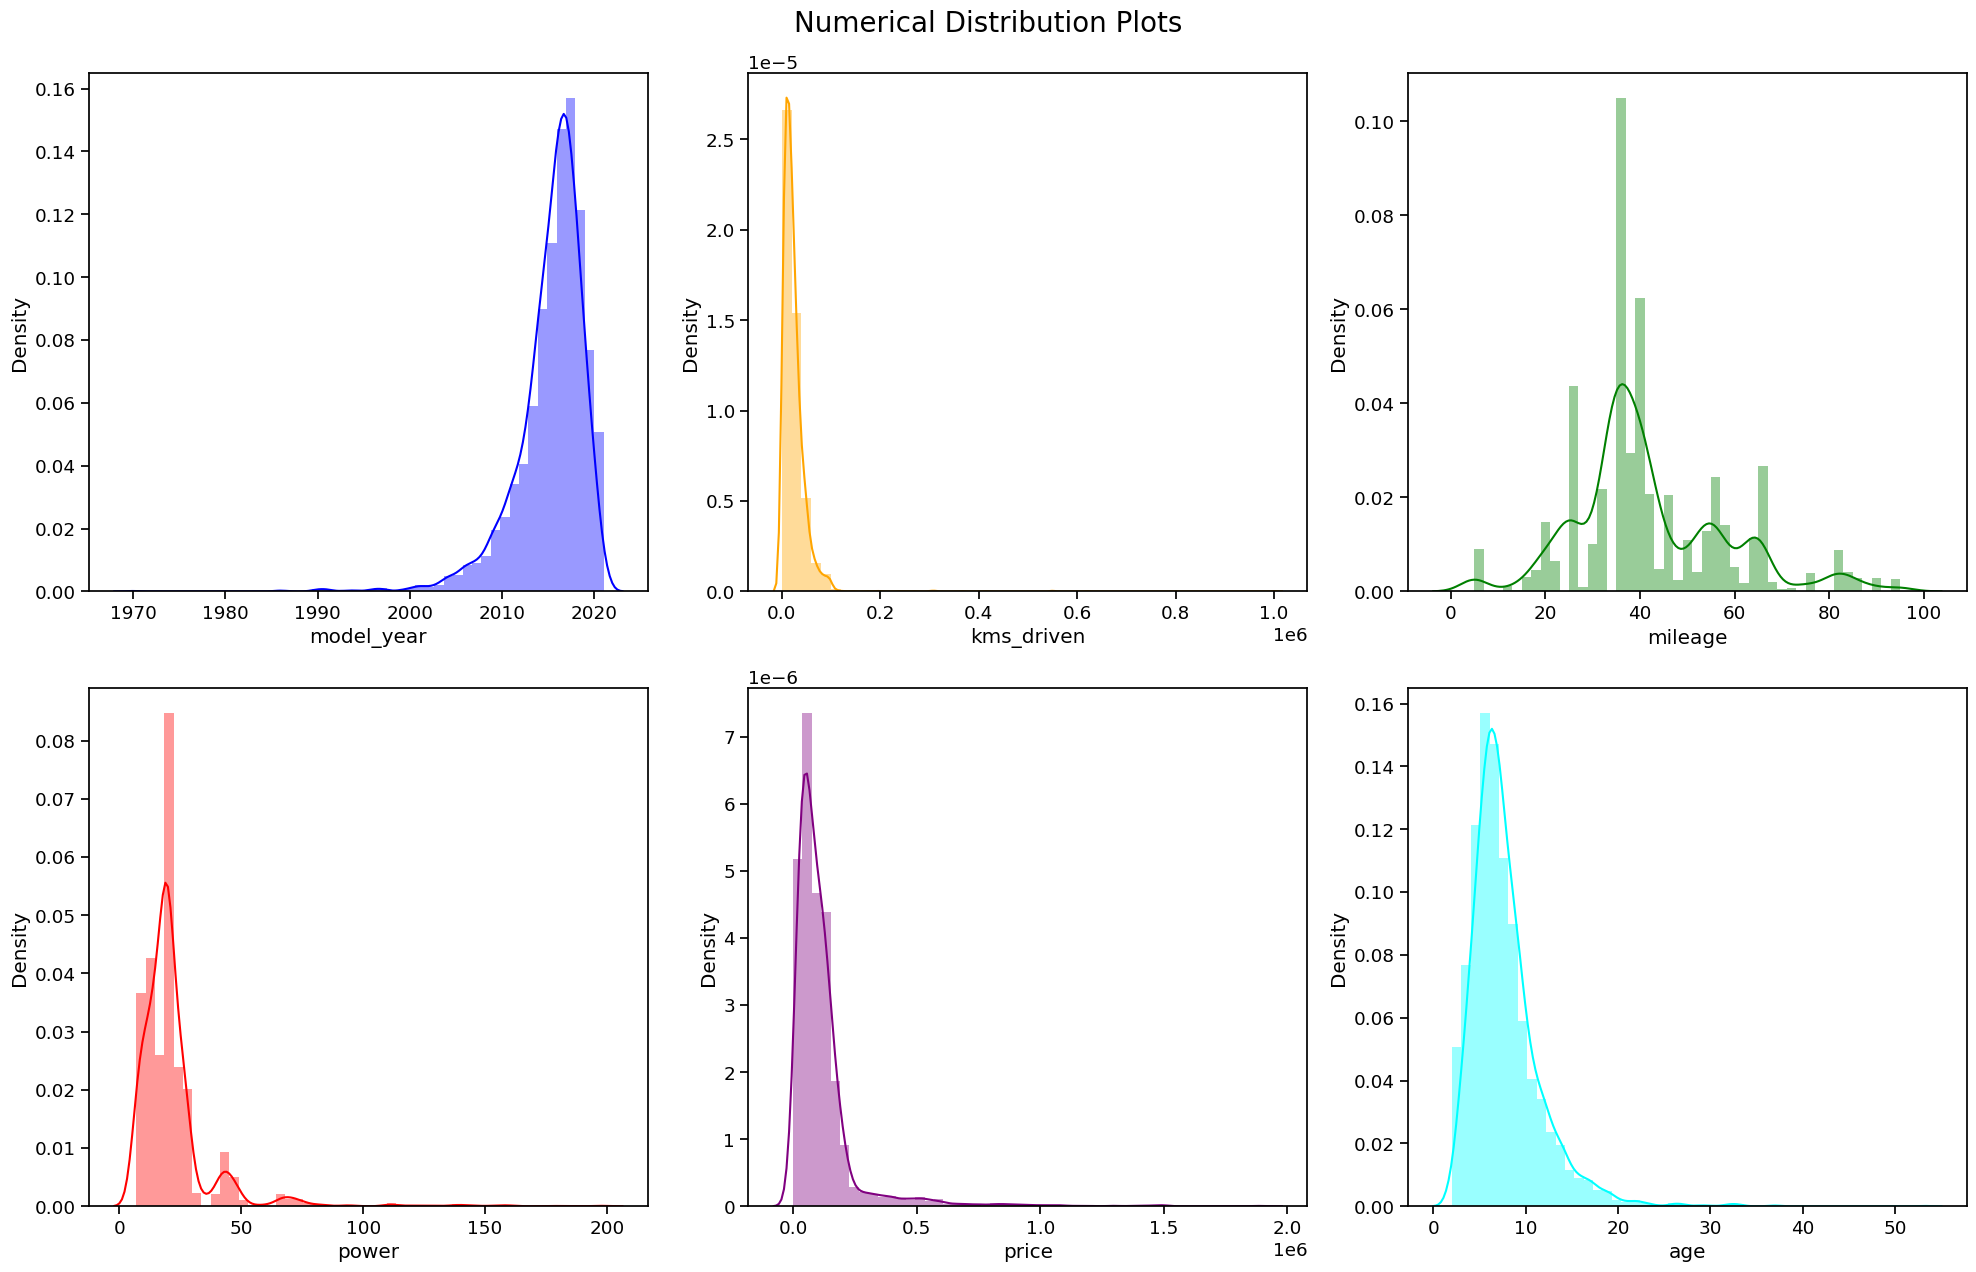

In [190]:
sns.set_context('notebook', font_scale=1.2)
fig, ax = plt.subplots(2, 3, figsize=(20, 13))

plt.suptitle('Numerical Distribution Plots', fontsize=20)

sns.distplot(data['model_year'], ax=ax[0, 0], color='blue')
ax[0, 0].set(xlabel='model_year')

sns.distplot(data['kms_driven'], ax=ax[0, 1], color='orange')
ax[0, 1].set(xlabel='kms_driven')

sns.distplot(data['mileage'], ax=ax[0, 2], color='green')
ax[0, 2].set(xlabel='mileage')

sns.distplot(data['power'], ax=ax[1, 0], color='red')
ax[1, 0].set(xlabel='power')

sns.distplot(data['price'], ax=ax[1, 1], color='purple')
ax[1, 1].set(xlabel='price')

sns.distplot(data['age'], ax=ax[1, 2], color='cyan')
ax[1, 2].set(xlabel='age')

plt.tight_layout()
plt.show()


In [191]:
import plotly.express as px

df = data['company'].value_counts().reset_index()
df.columns = ['company', 'count']

fig = px.bar(df, x='company', y='count', color='company', title='Company Counts', text='count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(xaxis_title='Company', yaxis_title='Count', showlegend=False)

fig.show()

In [253]:
import plotly.express as px
fig = px.strip(data, x='company', y="price", orientation="h",color ='company')
fig.show()

In [193]:
freq = data['bike_model'].value_counts()[:20]

In [194]:
fig = px.bar(freq, x=freq.index, y=freq.values, labels={'x': 'Bike Model', 'y': 'Frequency'},color='bike_model')
fig.update_layout(title='Top 20 Bike Models by Frequency', xaxis_tickangle=-45, height=400)

fig.show()

In [195]:
model_price = data[['bike_model','price']].sort_values(by='price',ascending=False)[:30]

In [196]:

fig = px.bar(model_price, x='bike_model', y='price', color='bike_model', 
             labels={'bike_model': 'Bike Model', 'price': 'Price'},
             height=400)
fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [197]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,Hyosung,GT250R 2012,11
5,KTM Duke 200cc 2012,2012,24561,third owner,bangalore,35.0,25.0,63400,KTM,Duke 200cc,11
6,Bajaj Pulsar 180cc 2016,2016,19718,first owner,bangalore,65.0,17.0,55000,Bajaj,Pulsar 180cc,7


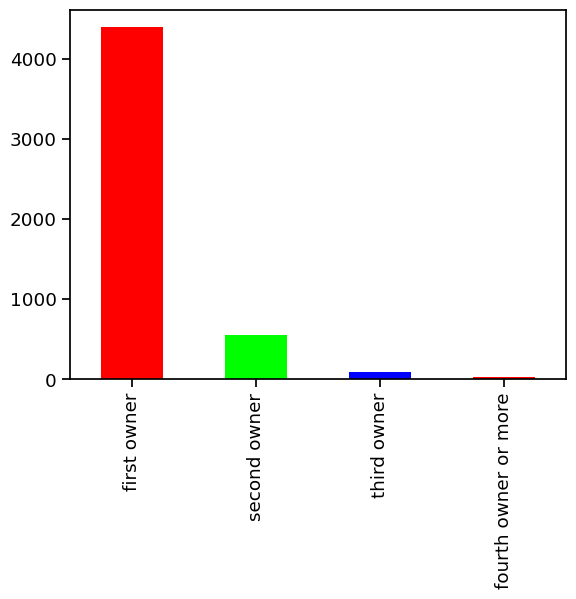

In [198]:
colors = ['#FF0000', '#00FF00', '#0000FF']  # Specify the colors for the bars

data['owner'].value_counts().plot(kind='bar', color=colors)
plt.show()

In [199]:
import plotly.express as px

fig = px.bar(data, x='owner', y='price', color='owner', labels={'price': 'Price'}, title='Bar Plot',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels

fig.show()

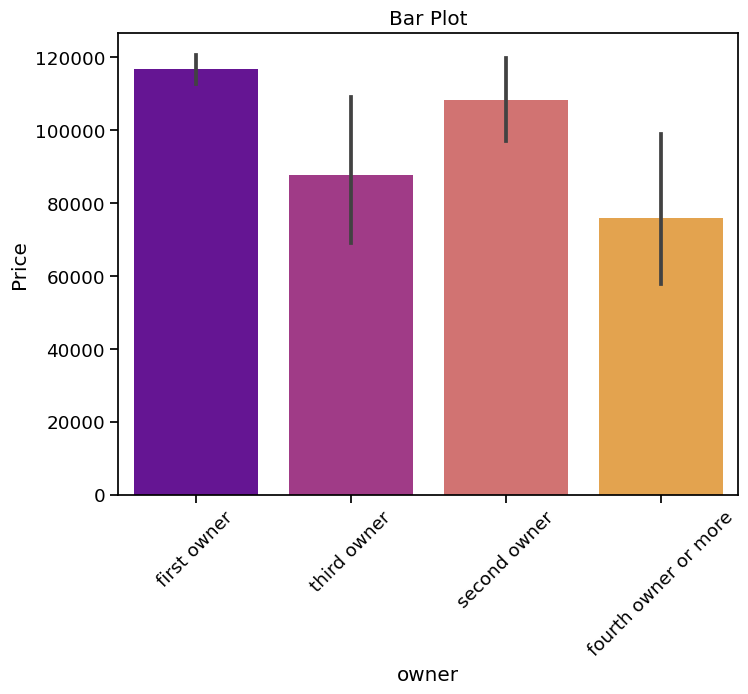

In [200]:

plt.figure(figsize=(8, 6))  # Increase figure size

#colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF']  # Specify the colors for the bars

sns.barplot(data=data, x=data['owner'], y='price', palette='plasma')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xlabel('owner')  # Add x-axis label
plt.ylabel('Price')  # Add y-axis label
plt.title('Bar Plot')  # Add plot title

plt.show()

In [201]:
data['price'].unique()

array([ 63500, 115000, 300000, ...,  26500,  39899,  61740], dtype=int64)

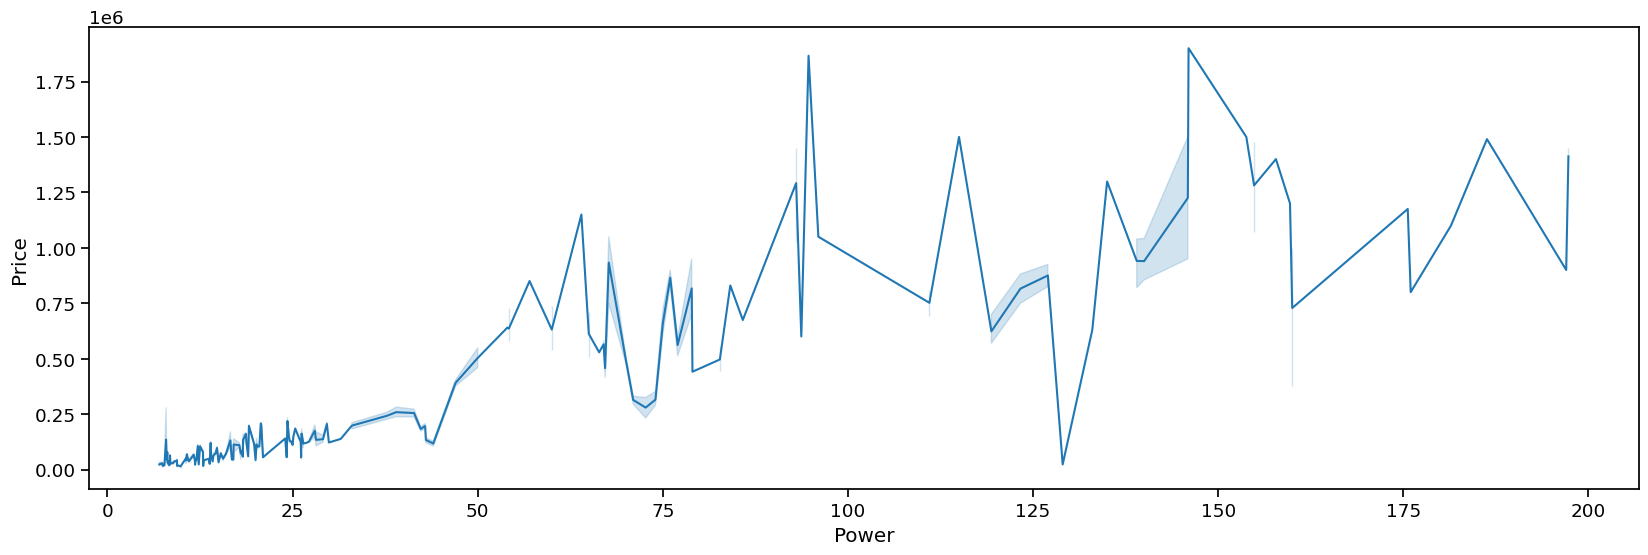

In [202]:
plt.figure(figsize=(20, 6))  

colors = sns.color_palette('viridis', len(data['power'].unique()))  

sns.lineplot(data=data, y='price', x='power', palette=colors)
plt.xticks(rotation=0)  
plt.xlabel('Power')  
plt.ylabel('Price')  

plt.show()

In [203]:
fre = data['location'].value_counts()[:10]

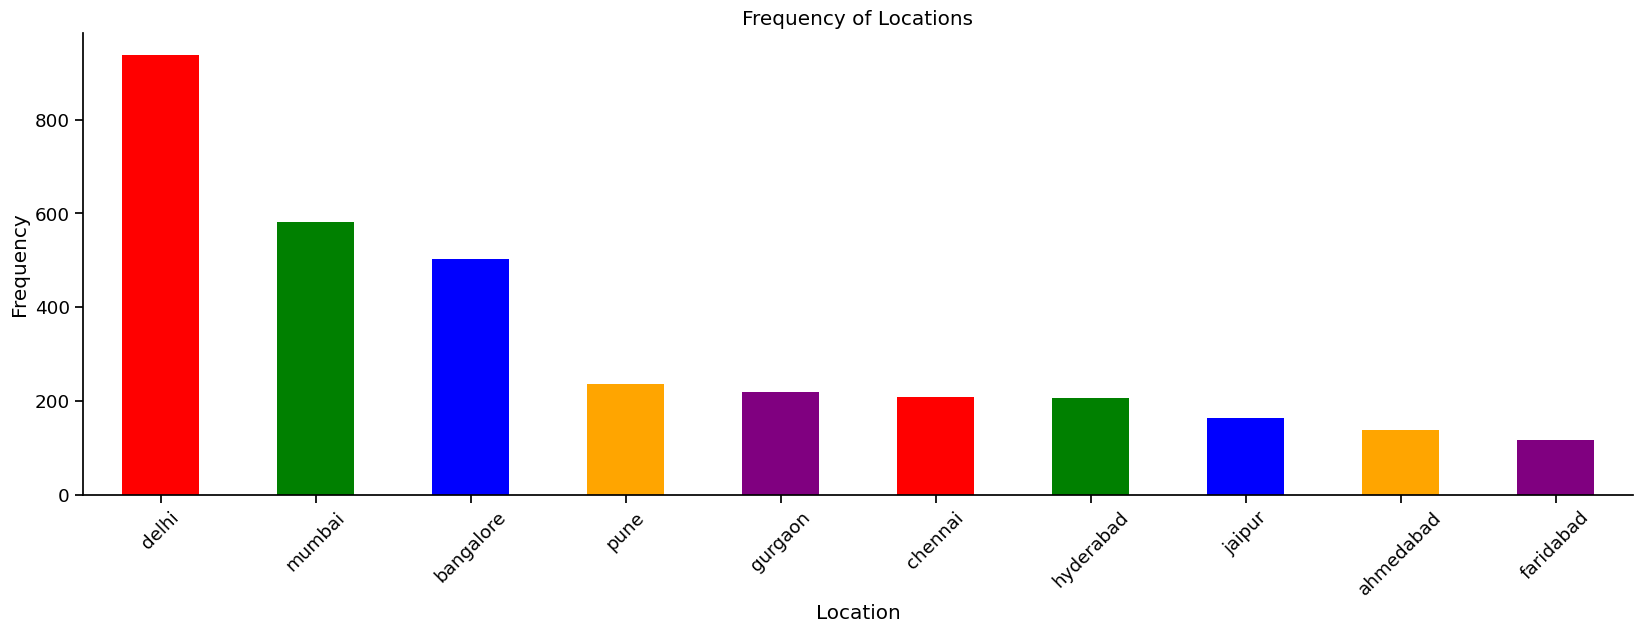

In [204]:
fig, ax = plt.subplots(figsize=(20, 6))
Color= ['red', 'green', 'blue', 'orange', 'purple']

fre.plot(kind='bar', color=Color, ax=ax)

# Customize the plot aesthetics
ax.set_xlabel('Location')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Locations')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=45)

plt.show()

In [205]:
loc_pri = data[['location','price']].sort_values(by='price',ascending=False)[:30]

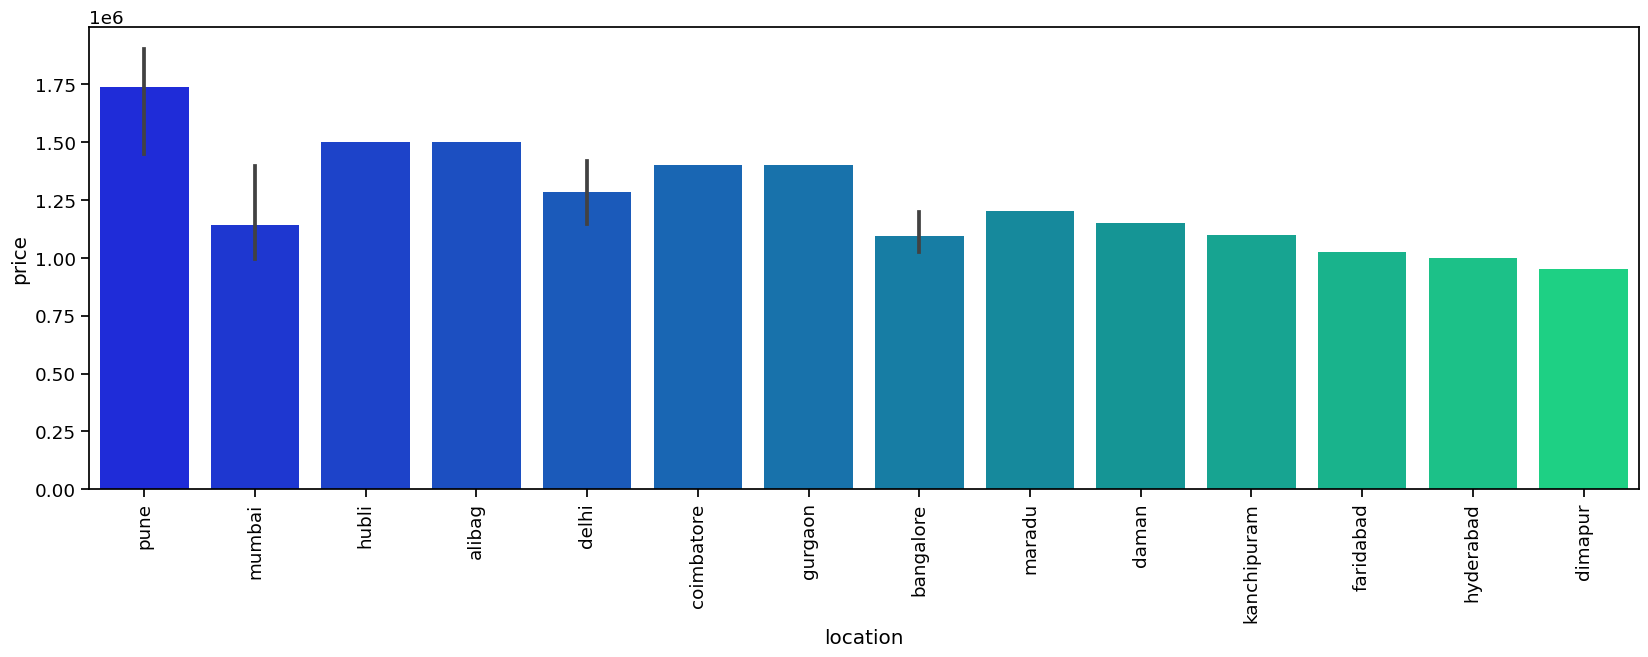

In [206]:
plt.figure(figsize=(20,6))

sns.barplot(data=loc_pri, x='location', y='price', palette='winter')
plt.xticks(rotation='vertical')

plt.show()

In [207]:
fig = px.scatter_matrix(data, dimensions=['model_year', 'kms_driven', 'mileage', 'power', 'price', 'age'], color="owner")

fig.update_layout(
    width=1400,  # Set the width of the figure to 1200 pixels
    height=1000   # Set the height of the figure to 720 pixels
)

fig.show()

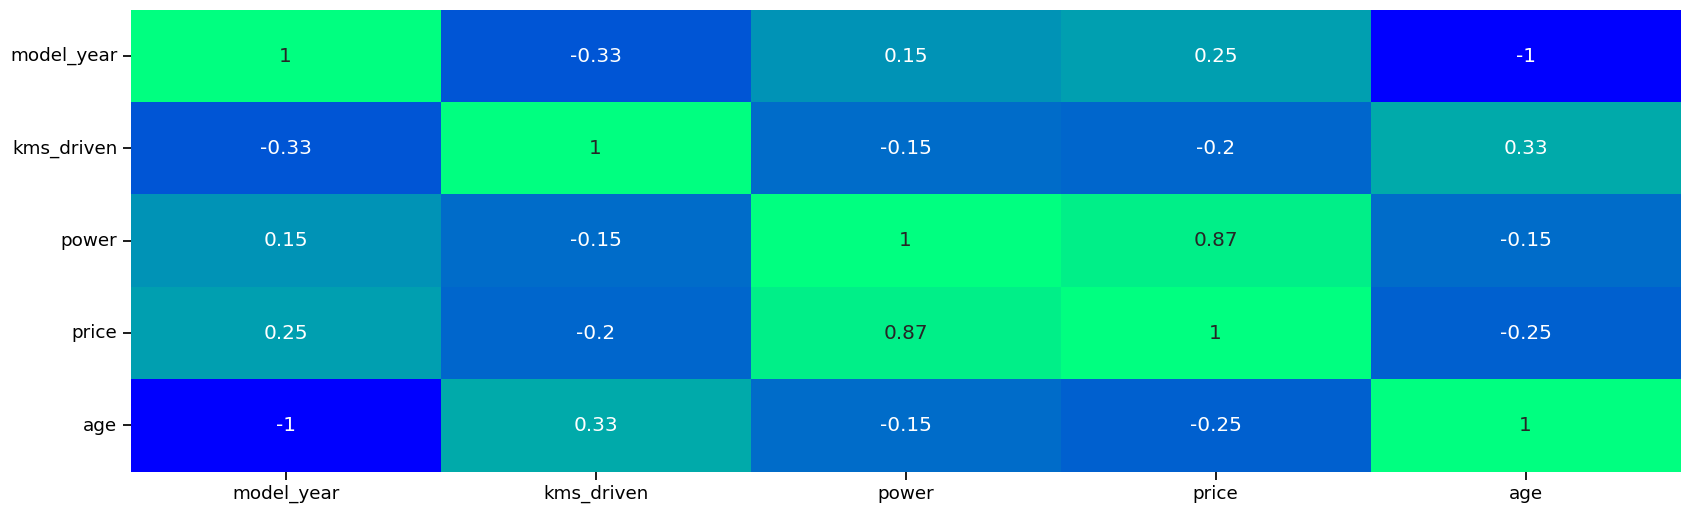

In [208]:
plt.figure(figsize=(20,6))

sns.heatmap(data.corr(),annot=True,cbar=False,cmap='winter')
plt.show()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🏭Model Building<a class="anchor" id="3"></a> 

In [209]:
data1 = data.copy()

In [210]:
data1.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,Hyosung,GT250R 2012,11
5,KTM Duke 200cc 2012,2012,24561,third owner,bangalore,35.0,25.0,63400,KTM,Duke 200cc,11
6,Bajaj Pulsar 180cc 2016,2016,19718,first owner,bangalore,65.0,17.0,55000,Bajaj,Pulsar 180cc,7


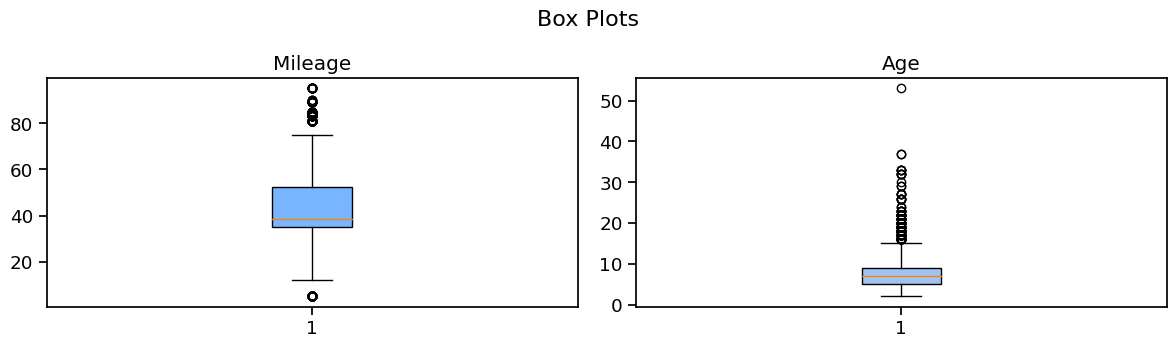

In [211]:
plt.figure(figsize=(12, 9))

colors = ['#77B5FE', '#A0C4F2']  # Winter colors for the box plots

plt.subplot(3, 2, 1)
plt.boxplot(data1['mileage'], patch_artist=True, boxprops=dict(facecolor=colors[0]))
plt.title('Mileage')

plt.subplot(3, 2, 2)
plt.boxplot(data1['age'], patch_artist=True, boxprops=dict(facecolor=colors[1]))
plt.title('Age')

plt.suptitle('Box Plots', fontsize=16)

plt.tight_layout()
plt.show()

In [212]:
data1 = data1[(data1['mileage'] < 70) & (data1['mileage'] > 20)]
data1 = data1[data1['age'] < 10]


In [213]:
data['mileage'] = data['mileage'].astype(float)


In [214]:
table = pd.pivot_table(data, index='company', values=['power','mileage','age']).sort_values(by ='mileage',ascending=False)[:10]
table

,age,mileage,power
company,,,
TVS,6.373737,60.645859,18.324646
Hero,9.779085,53.191804,10.309778
Bajaj,8.019074,51.438728,16.095359
Suzuki,6.505952,50.738095,18.142857
Mahindra,7.846154,49.038462,14.681538
Honda,8.406593,45.012088,25.700769
Yamaha,7.900498,43.338308,16.750025
UM,5.590551,35.000000,24.836220
BenelliImperiale,3.000000,35.000000,20.700000


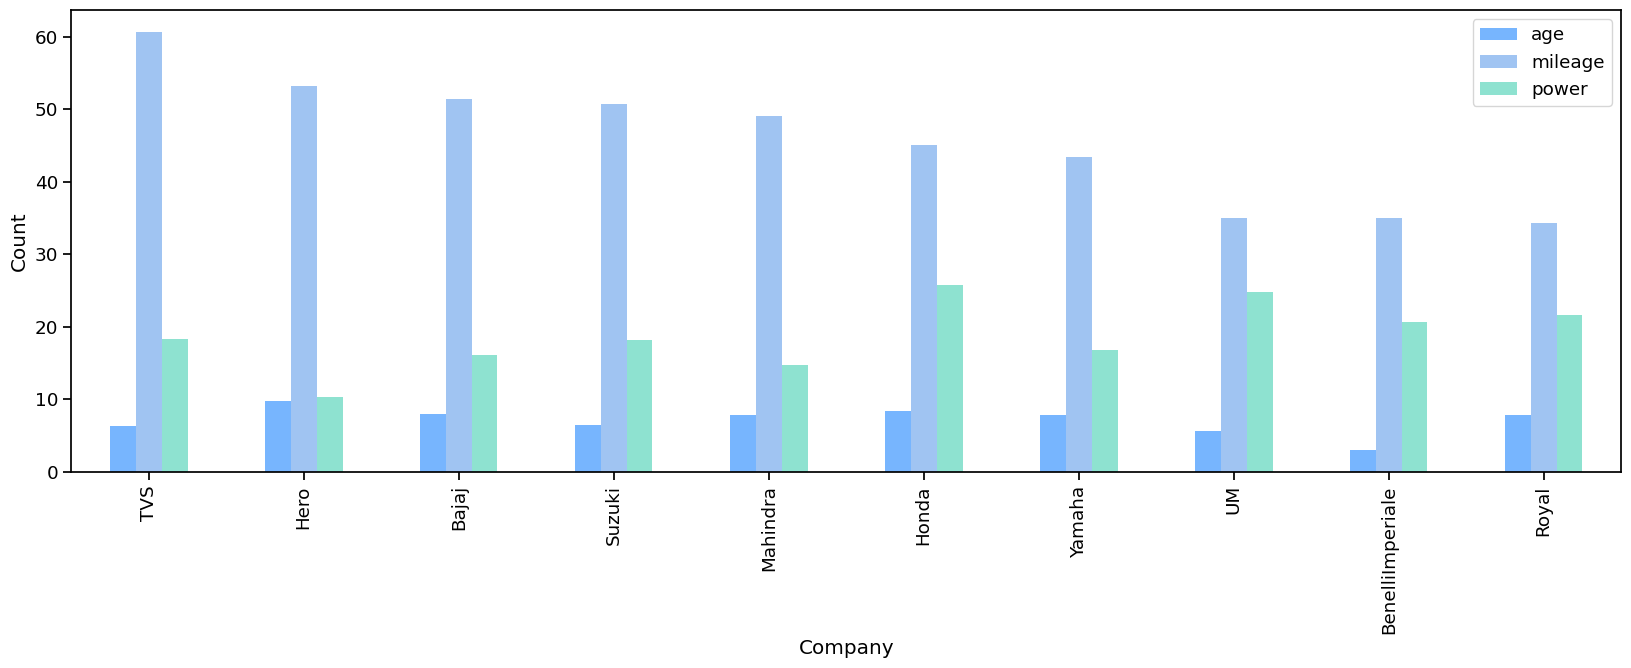

In [215]:
colors = ['#77B5FE', '#A0C4F2', '#8EE2D0']  # Winter colors for the bar plot

table.plot(kind='bar', figsize=(20, 6), color=colors)
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

In [216]:
table1= pd.pivot_table(data, index='owner', values=['price','kms_driven']).sort_values(by ='price',ascending=False)[:10]
table1

,kms_driven,price
owner,,
first owner,22564.101047,116835.166818
second owner,28932.504472,108386.234347
third owner,48309.780220,87610.780220
fourth owner or more,75327.342857,76009.971429


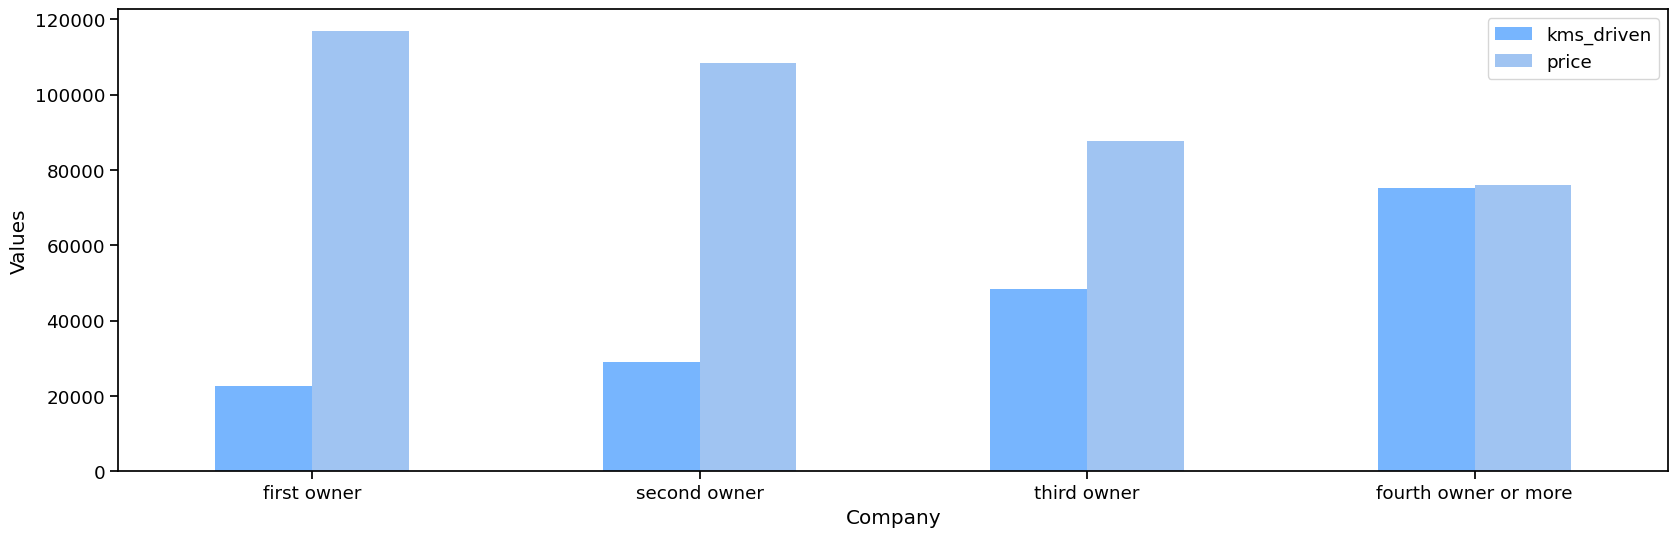

In [217]:
colors = ['#77B5FE', '#A0C4F2', '#8EE2D0']  # Winter colors for the bar plot

table1.plot(kind='bar', figsize=(20, 6), color=colors)
plt.xticks(rotation='horizontal')
plt.xlabel('Company')
plt.ylabel('Values')
plt.show()

In [218]:
encoder =LabelEncoder()

In [219]:
columns = ['model_name','owner','location','company','bike_model','model_year']

In [220]:
for i in columns:
    data1[i] = encoder.fit_transform(data1[i])

In [221]:
data1.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,8,3,17000,0,148,35.0,19.0,63500,0,7,6
1,346,2,50000,0,148,35.0,19.8,115000,11,30,7
6,57,2,19718,0,38,65.0,17.0,55000,0,81,7
8,262,4,1350,0,154,25.0,42.9,198000,8,28,5
10,348,4,25000,0,82,35.0,19.8,136900,11,30,5


In [222]:
data1.drop(columns=['model_name'],inplace=True)

In [223]:
X= data1.drop(columns=['price'],axis=1)
y=data1['price']

In [224]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [225]:
lr = LinearRegression()

In [226]:
lr.fit(x_train,y_train)

LinearRegression()

In [227]:
predict_lr = lr.predict(x_test)

In [228]:
score_lr = round((lr.score(x_test,y_test)*100),2)
print ("Model Score",score_lr,"%")

Model Score 73.66 %


In [229]:
rid =Ridge(alpha=100)

In [230]:
rid.fit(x_train,y_train)

Ridge(alpha=100)

In [231]:
predic_rid = rid.predict(x_test)

In [232]:
score_rid = round((rid.score(x_test,y_test)*100),2)
print ("Model Score",score_rid,"%")

Model Score 73.66 %


In [233]:
df = ["Liner Regression",score_lr],["Rigd Regression",score_rid]

In [234]:
final = pd.DataFrame(df,columns=['Algorithm','Model Score'],index=[1,2])
final

,Algorithm,Model Score
1,Liner Regression,73.66
2,Rigd Regression,73.66


In [235]:
data.columns

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price', 'company', 'bike_model', 'age'],
      dtype='object')

In [241]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 33127.18841489437


RMSE value of 33127.1884 suggests that, on average, the predictions of the used bike prices from the decision tree model have an error of around 33127.1884 Indian Rupees.

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 28983.940128969367
